In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import scipy.optimize as opt

### 1 Regularized linear regression
#### 1.1 Visualizing the data
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter: Xval, yval
- A test set for evaluating performance. These are 'unseen' examples which your model did not see during training: Xtest, ytest

In [15]:
data = io.loadmat('../MachineLearning/data/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [393]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']
X, Xval, Xtest = [np.insert(x, 0, values=np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

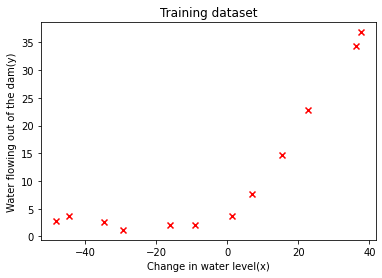

In [395]:
plt.scatter(x=data['X'], y=data['y'], marker='x', c='red')
plt.title('Training data')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.show()

#### 1.2 Regularized linear regression cost function
$$J(\Theta)=\frac{1}{2m}(\sum\limits_{i=1}^{m}(h_{\Theta}(x^{(i)}) - y^{(i)})^{2})+\frac{\lambda}{2m}(\sum\limits_{j=1}^{n}\theta_{j}^{2})$$
Note that you should not regularize the $\theta_0$ term.

In [396]:
def linearRegCostFunction(thetaP, X, y, reg):
    theta = thetaP.reshape(1, len(thetaP))
    h = X @ theta.T
    firstPart = np.sum(np.power(h - y, 2))
    secondPart = reg * np.sum(np.power(theta[:, 1:], 2))
    return (firstPart + secondPart) / (2 * X.shape[0])

In [397]:
theta = np.ones(2)
linearRegCostFunction(theta, X, y, 1)

303.9931922202643

In [398]:
a = np.arange(12).reshape((3,4))
print(a)
a[:, 1:]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

#### 1.3 Regularized linear regression gradient
$$\frac{\partial J(\theta)}{\partial \theta_{0}}=\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}=\frac{1}{m}X^{T}(X\theta-y)\,for\,j=0$$
$$\frac{\partial J(\theta)}{\partial \theta_{j}}=\left(\frac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}\right)+\frac{\lambda}{m}\theta_j\,for\,j\ge 1$$

In [399]:
def linearRegGradient(thetaP, X, y, reg):
    theta = thetaP.reshape(1, len(thetaP))
    firstPart = (X.T @ (X @ theta.T - y)).T
    tmp = theta[0, 0]
    theta[0, 0] = 0         # don't regularize intercept theta
    secondPart = reg * theta
    theta[0, 0] = tmp
    return (firstPart + secondPart) / X.shape[0]

In [400]:
linearRegGradient(theta, X, y, 1)

array([[-15.30301567, 598.25074417]])

#### 1.4 Fitting linear regression

In [401]:
def trainLinearReg(theta, X, y, reg):
    res = opt.fmin_tnc(func=linearRegCostFunction, x0=theta, fprime=linearRegGradient, args=(X, y, reg), messages=0)
    return res[0]

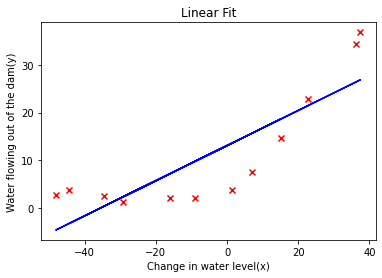

In [402]:
thetaFinal = trainLinearReg(theta, X, y, 0)
plt.scatter(X[:, 1], y, marker='x', c='r')
plt.plot(X[:, 1], X[:, 1] * thetaFinal[1] + thetaFinal[0], c='b')
plt.title('Linear Fit')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.show()

### 2 Bias-Variance
#### 2.1 Learning curves
When we are computing the training set error, make sure we compute it on the training subset (i.e. X[1:, :] and y[1:]) (instead of the entire training set). However, for the cross validation error, you should compute errors in the vectors error_train and error_val.

In [427]:
def learningCurves(theta, X, y, Xval, yval, reg):
    item_number = []
    error_train = []
    error_val = []

    for i in range(1, X.shape[0]):
        thetaFinal = np.array(trainLinearReg(theta, X[:i], y[:i], reg))
        item_number.append(i)
        error_train.append(linearRegCostFunction(thetaFinal, X[:i], y[:i], reg))
        error_val.append(linearRegCostFunction(thetaFinal, Xval, yval, 0))
    
    return item_number, error_train, error_val

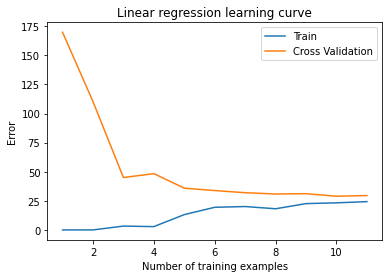

In [404]:
item_number, error_train, error_val = learningCurves(theta, X, y, Xval, yval, 0)
def plotLearningCurve(item_number, error_train, error_val):
    plt.plot(item_number, error_train, label='Train')
    plt.plot(item_number, error_val, label='Cross Validation')
    plt.title('Linear regression learning curve')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

plotLearningCurve(item_number, error_train, error_val)

### 3 Polynomial regression
Now you will add more features using the higher powers of the existing fearture $x$ in the data. Your task is to complete the code in polyFeatures so that the function maps the original training set X of size $m\times1$ into its higher powers. Specifically, when a training set X of size $m\times1$ is passed into the function, the function should return a $m\times p$ matrix X-poly, where column 1 holds the original values of X, column 2 holds the values of $x^2$, column 3 holds the values of $x^3$ and so on.

In [405]:
def polyFeatures(XP, p):
    """P >= 2
    """
    X = XP.copy()
    for i in range(2, p+1):
        X = np.c_[X, np.power(X[:, 0], i)]
    return X

In [406]:
polyFeatures(data['X'], 3)

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02],
       [ 1.53077929e+01,  2.34328523e+02,  3.58705250e+03],
       [-3.47062658e+01,  1.20452489e+03, -4.18045609e+04],
       [ 1.38915437e+00,  1.92974986e+00,  2.68072045e+00],
       [-4.43837599e+01,  1.96991814e+03, -8.74323736e+04],
       [ 7.01350208e+00,  4.91892115e+01,  3.44988637e+02],
       [ 2.27627489e+01,  5.18142738e+02,  1.17943531e+04]])

#### 3.1 Learning Polynomial Regression
Before learning the parameters $\theta$ for the polynomial regression, we will first call featrueNormalize and normalize the features of the training set, storing the $\mu, \sigma$ parameters separaterly.

In [407]:
def featureNormalize(X):
    return np.apply_along_axis(lambda column: (column - column.mean()) / column.std(), axis=0, arr=X)

def storingMuSigma(X):
    mu = []
    sigma = []

    for i in range(X.shape[1]):
        mu.append(X[:, i].mean())
        sigma.append(X[:, i].std())
    
    return mu, sigma

featureNormalize(polyFeatures(data['X'], 2))
mu, sigma = storingMuSigma(polyFeatures(data['X'], 8))

In [415]:
X = featureNormalize(polyFeatures(data['X'], 8))
X = np.insert(X, 0, np.ones(X.shape[0]), 1)
theta = np.ones(X.shape[1])
X.shape, theta.shape
thetaFinal = trainLinearReg(theta, X, y, 0)

In [409]:
def plotFeatureNormalize(X):
    for i in range(X.shape[1]):
        X[:, i] = (X[:, i] - mu[i]) / sigma[i]
    return X

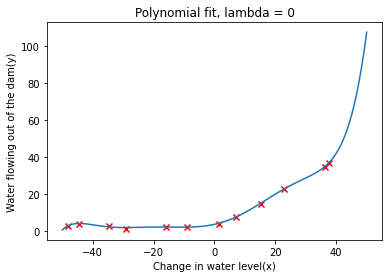

In [416]:
plt.scatter(data['X'], data['y'], marker='x', c='r')
plt_x = np.linspace(-50, 50, 120).reshape(120, 1)
plt_x = plotFeatureNormalize(polyFeatures(plt_x, 8))
plt_x = np.insert(plt_x, 0, np.ones(plt_x.shape[0]), 1)
plt_y = plt_x @ thetaFinal.reshape(thetaFinal.shape[0], 1)
plt.plot(np.linspace(-50, 50, 120), plt_y)
plt.title('Polynomial fit, lambda = 0')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.show()

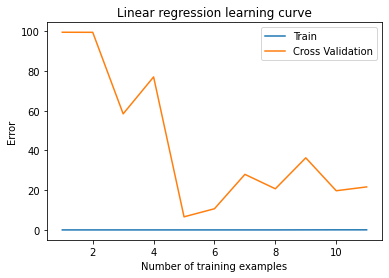

In [420]:
Xval = plotFeatureNormalize(polyFeatures(data['Xval'], 8))
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), 1)
item_number, error_train, error_val = learningCurves(theta, X, y, Xval, yval, 0)
plotLearningCurve(item_number, error_train, error_val)

#### 3.2 Adjusting the regularization parameter
For $\lambda=1$, you should see a polynomial fit that follows the data trend well and a learning curve showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda=1$ regularized polynomial regression model does not have the high-bias or high-variance problem. In effect, it achieves a good trade-off between bias and variance.

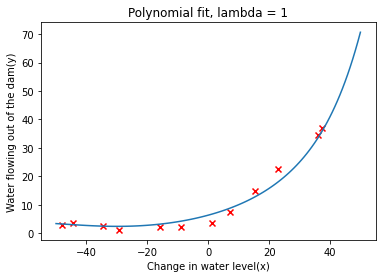

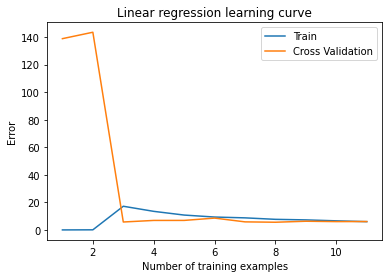

In [428]:
X = featureNormalize(polyFeatures(data['X'], 8))
X = np.insert(X, 0, np.ones(X.shape[0]), 1)
theta = np.ones(X.shape[1])
X.shape, theta.shape
thetaFinal = trainLinearReg(theta, X, y, 1)

plt.scatter(data['X'], data['y'], marker='x', c='r')
plt_x = np.linspace(-50, 50, 120).reshape(120, 1)
plt_x = plotFeatureNormalize(polyFeatures(plt_x, 8))
plt_x = np.insert(plt_x, 0, np.ones(plt_x.shape[0]), 1)
plt_y = plt_x @ thetaFinal.reshape(thetaFinal.shape[0], 1)
plt.plot(np.linspace(-50, 50, 120), plt_y)
plt.title('Polynomial fit, lambda = 1')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.show()

Xval = plotFeatureNormalize(polyFeatures(data['Xval'], 8))
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), 1)
item_number, error_train, error_val = learningCurves(theta, X, y, Xval, yval, 1)
plotLearningCurve(item_number, error_train, error_val)

#### Selecting $\lambda$ using a cross validation set
In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is.
Your task is to complete the code in validationCurve. Specifically, you should use the trainLinearReg function to train the model using different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.

In [429]:
def validationCurve(regRange, X, y, Xval, yval):
    theta = np.ones(X.shape[1])
    error_train = []
    error_val = []

    for reg in regRange:
        thetaFinal = trainLinearReg(theta, X, y, reg)
        error_train.append(linearRegCostFunction(thetaFinal, X, y, reg))
        error_val.append(linearRegCostFunction(thetaFinal, Xval, yval, 0))
    
    return error_train, error_val

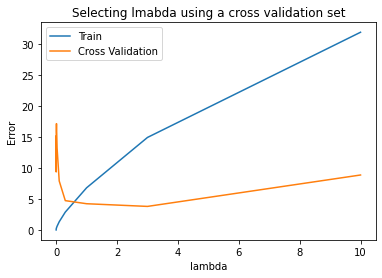

In [457]:
X = featureNormalize(polyFeatures(data['X'], 8))
X = np.insert(X, 0, np.ones(X.shape[0]), 1)
Xval = plotFeatureNormalize(polyFeatures(data['Xval'], 8))
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), 1)

regRange = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
error_train, error_val = validationCurve(regRange, X, y, Xval, yval)

def plotValidationCurve(regRange, error_train, error_val):
    plt.title('Selecting lmabda using a cross validation set')
    plt.xlabel('lambda')
    plt.ylabel('Error')
    plt.plot(regRange, error_train, label='Train')
    plt.plot(regRange, error_val, label='Cross Validation')
    plt.legend()
    plt.show()

plotValidationCurve(regRange, error_train, error_val)

#### 3.4 Computing test set error

In [453]:
Xtest = plotFeatureNormalize(polyFeatures(data['Xtest'], 8))
Xtest = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), 1)
theta = np.ones(Xtest.shape[1])
Xtest.shape

(21, 9)

In [458]:
thetaFinal = trainLinearReg(theta, X, y, 3)
linearRegCostFunction(thetaFinal, Xtest, ytest, 0)

3.572036298662906